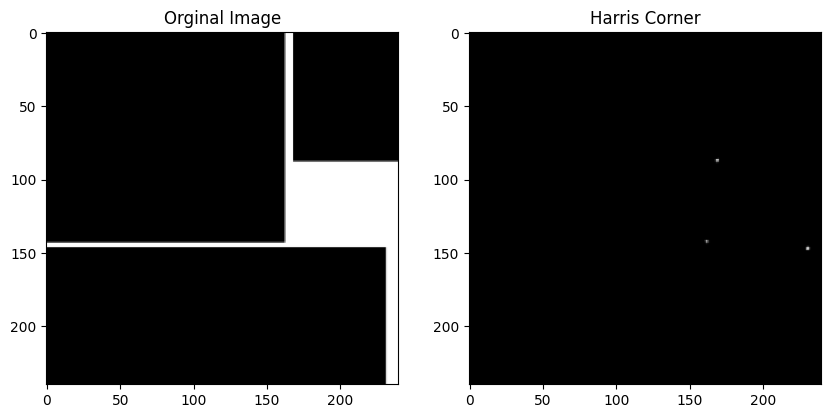

In [7]:
import numpy as np
import cv2

def harris_corner_detection(image, k=0.04, threshold=100000):
    # Convert image to grayscale if it's not already
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = np.float32(image)

    # Step 1: Compute gradients using Sobel operator
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Step 2: Compute M matrix components
    Ix2 = Ix ** 2
    Iy2 = Iy ** 2
    IxIy = Ix * Iy

    # Step 3: Compute sum of M matrix components over a neighborhood using a Gaussian kernel
    height, width = gray.shape
    window_size = 3
    offset = window_size // 2

    corner_response = np.zeros_like(gray, dtype=np.float32)

    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            # Calculate M matrix components sum over window
            sum_Ix2 = np.sum(Ix2[y-offset:y+offset+1, x-offset:x+offset+1])
            sum_Iy2 = np.sum(Iy2[y-offset:y+offset+1, x-offset:x+offset+1])
            sum_IxIy = np.sum(IxIy[y-offset:y+offset+1, x-offset:x+offset+1])

            # Construct M matrix
            M = np.array([[sum_Ix2, sum_IxIy],
                          [sum_IxIy, sum_Iy2]])

            # Step 4: Calculate the determinant and trace of M
            det_M = np.linalg.det(M)
            trace_M = np.trace(M)

            # Step 5: Calculate corner response R
            R = det_M - k * (trace_M ** 2)

            # Step 6: Apply threshold and mark corners
            if R > threshold:
                corner_response[y, x] = R

    return corner_response

# Example usage:
if __name__ == "__main__":
    # Load an image (replace with your own image path)
    image_path = 'Grid.png'
    image = cv2.imread(image_path,0)

    # Perform Harris corner detection
    corner_response = harris_corner_detection(image)

    # Display results (optional)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Orginal Image")
    plt.imshow(image,cmap="gray")
    plt.subplot(1,2,2)
    plt.title("Harris Corner")
    plt.imshow(corner_response,cmap="gray")